# Task -1 
## Malaria Cases across the World

We will be deep-diving into the malaria data obtained from the last 30 years and understanding the key insights that we can observe 

The project has been created to answer certain questions that arise about the healthcare system to tackle Malaria outbreak across the world.

#### Summary of results:
- **How does the incidence rate compare with the death rate?** :
We observe that the most of the countries in the African continent suffer from high incidence and high death rates, much more compared to countries in other continents. In the African continent, we observe that countries like Sierra Leone, Burkina Faso, Uganda, Equitorial Guinea, Ivory Coast, Mali, Niger, Nigeria and Democratic Republic of Congo have the most deceased from Malaria. While Turkey had a high incidence rate, it was able to reduce the number of deaths that occur from malaria. Majority of the countries in Asia, North America and South America are able to reduce the incidence and death rates from malaria. Countries, such as  Madagascar and Somalia, are shown to have low incidence but a high death rate, which should signal that the healthcare system should change drastically.

- **Which countries were able to substantantially reduce the number of deaths from malaria as compared to their numbers in 2003 (peak malaria outbreak)?** :
We observe that 2 countries, namely Ethiopia and Morocco, in Africa were able to bring down the number of deaths from Malaria considerably as compared to other countries. Similarly, the middle east were able to do the same, even when they had much lesser number of deaths as compared to Africa. However, there are still a few countries, such as Zimbabwe, and Egypt which haven't had much difference as compared to their African neighbors.

- **Has child mortality due to malaria reduced across the years in all countries?** :
We observe that, from 1990-2016, Nigeria and Democratic Replublic of Congo have the highest child mortalities, followed by India, which is the only nation in Asia to have a child mortality comparable to other African nations. Nigeria, Democratic Republic of Congo and India show the highest variations in child mortality due to malaria between the years 1990 and 2016, with cases increasing from 1990  to 2003 and then subsquently reducing.

- **Can we predict the number of cases across each country in the coming years?** :
An R2 value of 0.99 shows us that the model is good at predicting future values. This shows that the model, created using Random Forest Regression, gives a really good prediction of how many potential deaths, due to malaria, could occur in a country.

#### Package installations

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pycountry_convert as pc
import plotly_express as px

import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [2]:
#Extracting the data from github and creating dataframes
md_url = 'C:/Users/navee/Documents/GitHub/DBA5106/tidytuesday/data/2018/2018-11-13/malaria_deaths.csv' 
md_age_url = 'C:/Users/navee/Documents/GitHub/DBA5106/tidytuesday/data/2018/2018-11-13/malaria_deaths_age.csv'
md_inc_url = 'C:/Users/navee/Documents/GitHub/DBA5106/tidytuesday/data/2018/2018-11-13/malaria_inc.csv'

md_df = pd.read_csv(md_url)
md_age_df = pd.read_csv(md_age_url, index_col = 0)
md_inc_df = pd.read_csv(md_inc_url)

### Initial exploration

In [3]:
#Initial exploration
md_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6156 non-null   object 
 1   Code                                                                              5292 non-null   object 
 2   Year                                                                              6156 non-null   int64  
 3   Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [4]:
md_df.describe()

,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
count,6156.000000,6156.000000
mean,2003.000000,16.375074
std,7.789514,38.606219
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.020219
75%,2010.000000,3.891035
max,2016.000000,229.228881


In [5]:
md_age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30780 entries, 1 to 30780
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   entity     30780 non-null  object 
 1   code       26460 non-null  object 
 2   year       30780 non-null  int64  
 3   age_group  30780 non-null  object 
 4   deaths     30780 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [6]:
md_age_df.describe()

,year,deaths
count,30780.000000,30780.000000
mean,2003.000000,3698.550438
std,7.789007,33539.059413
min,1990.000000,0.000000
25%,1996.000000,0.000000
50%,2003.000000,0.123451
75%,2010.000000,80.505605
max,2016.000000,752025.548675


In [7]:
md_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 4 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Entity                                                                              508 non-null    object 
 1   Code                                                                                400 non-null    object 
 2   Year                                                                                508 non-null    int64  
 3   Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)  508 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 16.0+ KB


In [8]:
md_inc_df.describe()

,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
count,508.00000,508.000000
mean,2007.50000,141.714565
std,5.59568,176.637900
min,2000.00000,0.000000
25%,2003.75000,6.986310
50%,2007.50000,57.050000
75%,2011.25000,246.050000
max,2015.00000,1741.000000


In [9]:
md_df.head()

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [10]:
md_age_df.head()

,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363


In [11]:
md_inc_df.head()

,Entity,Code,Year,"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)"
0,Afghanistan,AFG,2000,107.100000
1,Afghanistan,AFG,2005,46.500000
2,Afghanistan,AFG,2010,23.900000
3,Afghanistan,AFG,2015,23.600000
4,Algeria,DZA,2000,0.037746


### Data Cleaning

In [12]:
#Renaming long column headers
md_df.rename(columns = {'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)' : 'deaths'}, inplace=True)
md_inc_df.rename(columns = {'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)' : 'incidence'}, inplace = True)

In [13]:
# Number of null values present in the malaria_deaths.csv file
md_df.isnull().sum()

Entity      0
Code      864
Year        0
deaths      0
dtype: int64

In [14]:
#Viewing the list of records which have null values for the codes
df_na = md_df[['Entity', 'Code']]
df_na = df_na.drop_duplicates()
df_na[df_na['Code'].isnull()].head()

,Entity,Code
108,Andean Latin America,NaN
270,Australasia,NaN
972,Caribbean,NaN
1026,Central Asia,NaN
1053,Central Europe,NaN


### How does the incidence rate compare with the death rate of malaria?

In [15]:
#Removing records that do not have country codes
inc_country = md_inc_df.drop(md_inc_df[md_inc_df['Code'].isnull()].index)

#Creating a dataframe that has only the country names, its country code and the number of deaths across all years
md_sum = md_df.groupby(['Entity', 'Code'])['deaths'].sum().reset_index(name = 'Total deaths')
md_sum = md_sum.drop(md_sum[md_sum['Entity'] == 'World'].index)

#Creating a function to extract the continent in which the country is located
def country_code(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

#Including Continent name to the dataframe
md_sum['Continent'] = None
na_list = []
for i in range(len(md_sum)):
    country = md_sum['Entity'].iloc[i]
    try:
        md_sum['Continent'].iloc[i] = country_code(country)
    except:
        na_list.append(country)

md_sum.head()

C:\Users\navee\AppData\Local\Temp\ipykernel_9408\3958758100.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_sum['Continent'].iloc[i] = country_code(country)


,Entity,Code,Total deaths,Continent
0,Afghanistan,AFG,206.217211,Asia
1,Albania,ALB,0.000000,Europe
2,Algeria,DZA,0.674352,Africa
3,American Samoa,ASM,6.835704,Oceania
4,Andorra,AND,0.000000,Europe


In [16]:
#Understanding which countries do not have its continent name updated 
print(md_sum.isnull().sum(), na_list)

Entity          0
Code            0
Total deaths    0
Continent       4
dtype: int64 ["Cote d'Ivoire", 'Democratic Republic of Congo', 'Micronesia (country)', 'Timor']


In [17]:
#listing continents for missing ones
cont_missing_dict = {
    "Cote d'Ivoire" : "Africa",
    "Democratic Republic of Congo" : "Africa",
    "Micronesia (country)" : "Oceania",
    "Timor" : "Asia"
}

for i in range(len(md_sum)):
    if str(md_sum['Continent'].iloc[i]) == 'None':
        md_sum['Continent'].iloc[i] = cont_missing_dict[md_sum['Entity'].iloc[i]]

md_sum.isnull().sum()

C:\Users\navee\AppData\Local\Temp\ipykernel_9408\612659101.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md_sum['Continent'].iloc[i] = cont_missing_dict[md_sum['Entity'].iloc[i]]


Entity          0
Code            0
Total deaths    0
Continent       0
dtype: int64

In [18]:
#Creating a dataframe to view both incidence and deaths across each country over a 15 year period

#Creating two separate dataframes for incidence and deaths
country_df1 = inc_country.groupby(['Entity', 'Code'])['incidence'].mean().reset_index(name = 'incidence')
country_df2 = md_df[['Entity', 'Code', 'deaths']].groupby(['Entity', 'Code'])['deaths'].mean().reset_index(name = 'Total deaths')

#Merging the two dataframes
country_df = pd.merge(country_df1, country_df2, on = ['Entity', 'Code'], how = 'left')
country_df = country_df.drop(country_df[country_df['Entity'] == 'World'].index).reset_index().drop(columns = 'index')
print(len(country_df))

#Including continent information
country_df = pd.merge(country_df, md_sum[['Entity', 'Continent']], on = 'Entity', how = 'left')
country_df.head()

99


,Entity,Code,incidence,Total deaths,Continent
0,Afghanistan,AFG,50.275000,7.637674,Asia
1,Algeria,DZA,0.010736,0.024976,Africa
2,Angola,AGO,213.325000,32.126978,Africa
3,Argentina,ARG,1.150000,0.014885,South America
4,Azerbaijan,AZE,5.275000,0.021613,Asia


In [19]:
country_df.isnull().sum()

Entity          0
Code            0
incidence       0
Total deaths    0
Continent       0
dtype: int64

In [20]:
country_df['Continent'].value_counts()

Africa           47
Asia             29
South America    10
North America    10
Oceania           3
Name: Continent, dtype: int64

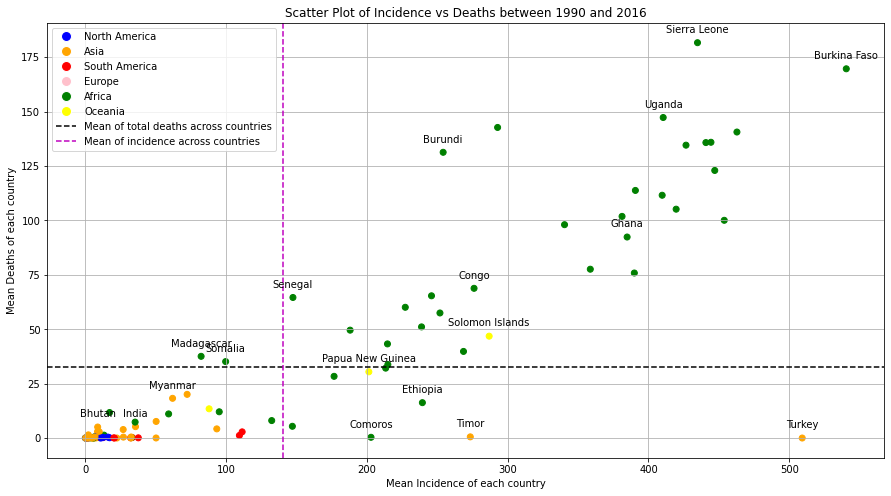

In [21]:
#Assigning colors to each continent
colors = {'North America': 'blue', 'Asia': 'orange', 'South America': 'red', 'Europe': 'pink', 'Africa' : 'green', 'Oceania' : 'yellow'}

plt.figure(figsize=(15, 8))
plt.scatter(country_df['incidence'], country_df['Total deaths'], marker='o', color=country_df['Continent'].map(colors))

country_anno = ['Burkina Faso', 'Sierra Leone', 'Equitorial Guinea', 'Burundi', 
                'Ghana', 'Uganda', 'Turkey', 'Solomon Islands', 'India', 'Myanmar',
                'Papua New Guinea', 'Ethiopia', 'Comoros', 'Senegal', 'Timor', 'Bhutan', 'Congo', 'Madagascar', 'Somalia']

# Label the points with country names
for i in range(len(country_df)):
    if country_anno.count(country_df['Entity'][i]) > 0:
        plt.annotate(country_df['Entity'][i], (country_df['incidence'][i], country_df['Total deaths'][i]), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Add a line parallel to the x-axis
x_line_position = country_df['Total deaths'].mean()  # Specify the x-position for the line
plt.axhline(y=x_line_position, color='k', linestyle='--', label=f'Mean of total deaths across countries')

# Add a line parallel to the y-axis
y_line_position = country_df['incidence'].mean()  # Specify the y-position for the line
plt.axvline(x=y_line_position, color='m', linestyle='--', label=f'Mean of incidence across countries')


plt.xlabel('Mean Incidence of each country')
plt.ylabel('Mean Deaths of each country')
plt.title('Scatter Plot of Incidence vs Deaths between 1990 and 2016')
plt.grid(True)

# Create a legend for the continents
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=continent) 
                 for continent, color in colors.items()]
legend_labels += [plt.Line2D([0], [0], color='k', linestyle='--', label=f'Mean of total deaths across countries'), plt.Line2D([0], [0], color='m', linestyle='--', label=f'Mean of incidence across countries')]

plt.legend(handles=legend_labels)

plt.show()


We observe that the most of the countries in the African continent suffer from high incidence and high death rates, much more compared to countries in other continents. In the African continent, we observe that countries like Sierra Leone, Burkina Faso, Uganda, Equitorial Guinea, Ivory Coast, Mali, Niger, Nigeria and Democratic Republic of Congo have the most deceased from Malaria. While Turkey had a high incidence rate, it was able to reduce the number of deaths that occur from malaria. Majority of the countries in Asia, North America and South America are able to reduce the incidence and death rates from malaria. Countries, such as Madagascar and Somalia, are shown to have low incidence but a high death rate, which should signal that the healthcare system should change drastically.

### Which countries were able to substantantially reduce the number of deaths from malaria as compared to their numbers in 2003?

In [22]:
#Filtering out data for the number of deaths for each country for the years 2003 and 2016
df_03_16 = md_df[md_df['Year'].isin([2003, 2016])]
df_03_16

,Entity,Code,Year,deaths
13,Afghanistan,AFG,2003,9.012489
26,Afghanistan,AFG,2016,7.139429
40,Albania,ALB,2003,0.000000
53,Albania,ALB,2016,0.000000
67,Algeria,DZA,2003,0.026066
...,...,...,...,...
6101,Yemen,YEM,2016,0.032792
6115,Zambia,ZMB,2003,68.474635
6128,Zambia,ZMB,2016,29.473210
6142,Zimbabwe,ZWE,2003,9.754050


In [23]:
#Creating pivot table to show the only include 2003 and 2016 data for each country
df_compare = pd.pivot_table(df_03_16, index = df_03_16[['Entity', 'Code']], columns = ['Year'], values='deaths').reset_index()

#Formulating the percentage difference between the number of deaths in 2003 and 2016
df_compare["percent_diff"] = ((df_compare[2016] - df_compare[2003]) * 100) / df_compare[2003]
df_compare.columns = df_compare.columns.tolist()
df_compare.head()

,Entity,Code,2003,2016,percent_diff
0,Afghanistan,AFG,9.012489,7.139429,-20.782940
1,Albania,ALB,0.000000,0.000000,NaN
2,Algeria,DZA,0.026066,0.021669,-16.867914
3,American Samoa,ASM,0.242116,0.206802,-14.585622
4,Andorra,AND,0.000000,0.000000,NaN


In [24]:
#Dropping those rows where the country code is not available
df_compare = df_compare.drop(df_compare[df_compare['percent_diff'].isnull()].index)
df_compare.isnull().sum()

Entity          0
Code            0
2003            0
2016            0
percent_diff    0
dtype: int64

In [25]:
#Viewing statistics of the reduction in the number of deaths attributed to malaria across all countries
fig = px.choropleth(df_compare, locations='Code', scope='world', color='percent_diff', color_continuous_scale = 'Blackbody',
                    hover_name='Entity', title='Reduction in deaths from malaria between 2003 and 2018 in each country ',height=800)
fig.show()

We observe that 2 countries, namely Ethiopia and Morocco, in Africa were able to bring down the number of deaths from Malaria considerably as compared to other countries. Similarly, the middle east were able to do the same, even when they had much lesser number of deaths as compared to Africa. However, there are still a few countries, such as Zimbabwe, and Egypt which haven't had much difference as compared to their African neighbors.

### Has child mortality due to malaria reduced across the years in all countries?

In [26]:
#Creating a dataframe of the mortality of children below the age of 5, across each country for each year
child_years_df = md_age_df[md_age_df['age_group'] == 'Under 5']
child_years_df = child_years_df.drop(child_years_df[child_years_df['entity'] == 'World'].index)
child_years_df = child_years_df.drop(child_years_df[child_years_df['code'].isnull()].index)
child_years_df.head()

,entity,code,year,age_group,deaths
1,Afghanistan,AFG,1990,Under 5,184.606435
2,Afghanistan,AFG,1991,Under 5,191.658193
3,Afghanistan,AFG,1992,Under 5,197.140197
4,Afghanistan,AFG,1993,Under 5,207.357753
5,Afghanistan,AFG,1994,Under 5,226.209363


In [27]:
#Visualizing the change in child mortality from malaria across countries for each year using a slider function to view data across years

# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the web application
app.layout = html.Div([
    dcc.Graph(id='choropleth-map'),
    dcc.Slider(
        id='year-slider',
        min = child_years_df['year'].min(),
        max = child_years_df['year'].max(),
        value = child_years_df['year'].min(),
        marks={str(year): str(year) for year in child_years_df['year'].unique()},
        step=None
    )
])

# Create callback to update the choropleth map based on the selected year
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('year-slider', 'value')]
)

def update_map(selected_year):
    filtered_data = child_years_df[child_years_df['year'] == selected_year]
    fig = px.choropleth(filtered_data, 
        locations='code',
        # locationmode='country names',
        color='deaths',
        hover_name='entity',
        range_color = (0, 275000),
        color_continuous_scale = 'deep',
        # projection='natural earth'
    )
    return fig

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)


We observe that, from 1990-2016, Nigeria and Democratic Replublic of Congo have the highest child mortalities, followed by India, which is the only nation in Asia to have a child mortality comparable to other African nations. Nigeria, Democratic Republic of Congo and India show the highest variations in child mortality due to malaria between the years 1990 and 2016, with cases increasing from 1990  to 2003 and then subsquently reducing.

### Can we predict the number of cases across each country in the coming years?

We will be using a simple RandomForest Regression model to determine if we are getting a good enough R2 value. If the R2 value is high (say greater than 0.7), we can consider using the model to predict the number of potential deaths in the country for the coming years.

In [28]:
#Creating a dataframe for regression model
md_country_df = md_df.drop(md_df[md_df['Code'].isnull()].index)
md_country_df = pd.merge(md_country_df, md_sum[['Entity', 'Continent']], on = 'Entity', how = 'left')
md_country_df.head()

,Entity,Code,Year,deaths,Continent
0,Afghanistan,AFG,1990,6.802930,Asia
1,Afghanistan,AFG,1991,6.973494,Asia
2,Afghanistan,AFG,1992,6.989882,Asia
3,Afghanistan,AFG,1993,7.088983,Asia
4,Afghanistan,AFG,1994,7.392472,Asia


In [29]:
#Creating one-hot encoded values for country and continent
countries = md_country_df['Entity'].str.get_dummies()
continents = md_country_df['Continent'].str.get_dummies()

#Merging the values with the regression dataframe
md_country_df = pd.concat([md_country_df, countries], axis=1)
md_country_df = pd.concat([md_country_df, continents], axis=1)

md_country_df.head()

,Entity,Code,Year,deaths,Continent,Afghanistan,Albania,Algeria,American Samoa,Andorra,...,World,Yemen,Zambia,Zimbabwe,Africa,Asia,Europe,North America,Oceania,South America
0,Afghanistan,AFG,1990,6.802930,Asia,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Afghanistan,AFG,1991,6.973494,Asia,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Afghanistan,AFG,1992,6.989882,Asia,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Afghanistan,AFG,1993,7.088983,Asia,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Afghanistan,AFG,1994,7.392472,Asia,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
#Keeping only necessary columns for the regression dataframe
df = md_country_df.drop(columns = ['Entity', 'Code', 'Continent'])
df.head()

,Year,deaths,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,...,World,Yemen,Zambia,Zimbabwe,Africa,Asia,Europe,North America,Oceania,South America
0,1990,6.802930,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1991,6.973494,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1992,6.989882,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1993,7.088983,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1994,7.392472,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
df.shape

(5292, 204)

In [32]:
from sklearn.preprocessing import StandardScaler

x = df.drop(columns = 'deaths')
y = df[['deaths']]

#Scaling the data using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

#Splitting the data across train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 22)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3704, 203), (1588, 203), (3704, 1), (1588, 1))

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#Fitting the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

#making predictions on test dataset
preds = model.predict(x_test)

#calculating r2 score
r2 = r2_score(y_test, preds)
print("R2 score: ", r2)

C:\Users\navee\AppData\Local\Temp\ipykernel_9408\363886413.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R2 score:  0.9958735440274292


An R2 value of 0.99 shows us that the model is good at predicting future values. This shows that the model, created using Random Forest Regression, gives a really good prediction of how many potential deaths could occur in a country.